<h1>Pandas</h1>

In [2]:
#installing pandas libraries
!pip install pandas-datareader
!pip install --upgrade html5lib==1.0b8

#There is a bug in the latest version of html5lib so install an earlier version
#Restart kernel after installing html5lib

Requirement already up-to-date: html5lib==1.0b8 in c:\users\abhil\appdata\local\enthought\canopy\edm\envs\user\lib\site-packages
  Found existing installation: six 1.10.0
    Uninstalling six-1.10.0:
      Successfully uninstalled six-1.10.0


<h2>Imports</h2>

In [3]:
import pandas as pd #pandas library
from pandas_datareader import data #data readers (google, html, etc.)
#The following line ensures that graphs are rendered in the notebook
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt #Plotting library
import datetime as dt #datetime for timeseries support

<h2>The structure of a dataframe</h2>

In [4]:
pd.DataFrame([[1,2,3],[1,2,3]],columns=['A','B','C']) 

,A,B,C
0,1,2,3
1,1,2,3


<h3>Accessing columns and rows</h3>

In [5]:
df = pd.DataFrame([['r1','00','01','02'],['r2','10','11','12'],['r3','20','21','22']],columns=['row_label','A','B','C'])
print(id(df))
df.set_index('row_label',inplace=True)
print(id(df))
df

2156643477824
2156643477824


,A,B,C
row_label,,,
r1,00,01,02
r2,10,11,12
r3,20,21,22


<h3>Getting column data</h3>

In [6]:
df['B']

row_label
r1    01
r2    11
r3    21
Name: B, dtype: object

<h3>Getting row data</h3>

In [7]:
df.loc['r1']

A    00
B    01
C    02
Name: r1, dtype: object

<h3>Getting a row by row number</h3>

In [8]:
df.iloc[0]

A    00
B    01
C    02
Name: r1, dtype: object

<h3>Getting multiple columns<h3>

In [9]:
df[['B','A']] #Note that the column identifiers are in a list

,B,A
row_label,,
r1,01,00
r2,11,10
r3,21,20


<h3>Getting a specific cell</h3>

In [10]:
df.loc['r2','B']

'11'

In [11]:
df.loc['r2']['A']

'10'

<h3>Slicing</h3>

In [12]:
df.loc['r1':'r2']

,A,B,C
row_label,,,
r1,00,01,02
r2,10,11,12


In [13]:
df.loc['r1':'r2','B':'C']

,B,C
row_label,,
r1,01,02
r2,11,12


<h2>Pandas datareader</h2>
<li>Access data from html tables on any web page</li>
<li>Get data from google finance</li>
<li>Get data from the federal reserve</li>

<h3>HTML Tables</h3>
<li>Pandas datareader can read a table in an html page into a dataframe
<li>the read_html function returns a list of all dataframes with one dataframe for each html table on the page

<h4>Example: Read the tables on the google finance page</h4>

In [14]:
df_list = pd.read_html('http://www.bloomberg.com/markets/currencies/major')
print(len(df_list))

1


<h4>The page contains only one table so the read_html function returns a list of one element</h4>

In [15]:
df = df_list[0]
print(df)

   Currency      Value  Change Net Change Time (EDT)  2 Day
0   EUR-USD     1.1789 -0.0004     -0.03%   11:41 PM    NaN
1   USD-JPY   112.3500  0.1100     +0.10%   11:41 PM    NaN
2   GBP-USD     1.3439 -0.0019     -0.14%   11:41 PM    NaN
3   AUD-USD     0.7879 -0.0007     -0.09%   11:41 PM    NaN
4   USD-CAD     1.2355  0.0006     +0.05%   11:41 PM    NaN
5   USD-CHF     0.9702  0.0015     +0.15%   11:42 PM    NaN
6   EUR-JPY   132.4600  0.0900     +0.07%   11:41 PM    NaN
7   EUR-GBP     0.8773  0.0010     +0.12%   11:41 PM    NaN
8   USD-HKD     7.8063 -0.0055     -0.07%   11:41 PM    NaN
9   EUR-CHF     1.1437  0.0012     +0.11%   11:41 PM    NaN
10  USD-KRW  1138.6500  1.7200     +0.15%   11:41 PM    NaN


<h4>Note that the read_html function has automatically detected the header columns</h4>
<h4>If an index is necessary, we need to explicitly specify it</h4>

In [16]:
df.set_index('Currency',inplace=True)
print(df)

              Value  Change Net Change Time (EDT)  2 Day
Currency                                                
EUR-USD      1.1789 -0.0004     -0.03%   11:41 PM    NaN
USD-JPY    112.3500  0.1100     +0.10%   11:41 PM    NaN
GBP-USD      1.3439 -0.0019     -0.14%   11:41 PM    NaN
AUD-USD      0.7879 -0.0007     -0.09%   11:41 PM    NaN
USD-CAD      1.2355  0.0006     +0.05%   11:41 PM    NaN
USD-CHF      0.9702  0.0015     +0.15%   11:42 PM    NaN
EUR-JPY    132.4600  0.0900     +0.07%   11:41 PM    NaN
EUR-GBP      0.8773  0.0010     +0.12%   11:41 PM    NaN
USD-HKD      7.8063 -0.0055     -0.07%   11:41 PM    NaN
EUR-CHF      1.1437  0.0012     +0.11%   11:41 PM    NaN
USD-KRW   1138.6500  1.7200     +0.15%   11:41 PM    NaN


<h4>Now we can use .loc to extract specific currency rates</h4>

In [17]:
df.loc['EUR-CHF','Value']

1.1436999999999999

<h3>Working with views and copies</h3>

<h4>Chained indexing creates a copy and changes to the copy won't be reflected in the original dataframe</h4>

In [18]:
eur_usd = df.loc['EUR-USD']['Change'] #This is chained indexing
df.loc['EUR-USD']['Change'] = 1.0 #Here we are changing a value in a copy of the dataframe
print(eur_usd)
print(df.loc['EUR-USD']['Change']) #Neither eur_usd, nor the dataframe are changed

-0.0004
-0.0004


C:\Users\abhil\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
eur_usd = df.loc['EUR-USD','Change'] #eur_usd points to the value inside the dataframe
df.loc['EUR-USD','Change'] = 1.0 #Change the value in the view 
print(eur_usd) #eur_usd is changed (because it points to the view)
print(df.loc['EUR-USD']['Change']) #The dataframe has been correctly updated

-0.0004
1.0


<h2>Getting historical stock prices from Google financs</h2>
Usage: DataReader(ticker,source,startdate,enddate)<br>
Unfortunately, the Yahoo finance datareader has stopped working because of a change to Yahoo's website


In [20]:
from pandas_datareader import data
import datetime as dt
start=dt.datetime(2017, 1, 1)
end=dt.datetime.today()


print(start,end)


df = data.DataReader('IBM', 'google', start, end)


2017-01-01 00:00:00 2017-09-26 23:34:13.170226


In [21]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2016-09-28,156.99,158.62,156.23,158.29,3310008
2016-09-29,158.63,165.00,157.46,158.11,3374838
2016-09-30,158.90,159.84,158.06,158.85,3596878
2016-10-03,158.06,158.37,157.02,157.61,2227800
2016-10-04,157.67,158.53,155.82,156.46,2884146
2016-10-05,157.07,157.83,156.72,157.08,1684458
2016-10-06,156.84,157.43,155.89,156.88,1950106
2016-10-07,157.14,157.70,154.86,155.67,2671852
2016-10-10,156.71,158.49,156.66,157.02,2481288


<h2>Datareader documentation</h2>
http://pandas-datareader.readthedocs.io/en/latest/</h2>

<h3>Working with a timeseries data frame</h3>
<li>The data is organized by time with the index serving as the timeline


<h4>Creating new columns</h4>
<li>Add a column to a dataframe
<li>Base the elements of the column on some combination of data in the existing columns
<h4>Example: Number of Days that the stock closed higher than it opened
<li>We'll create a new column with the header "UP"
<li>And use np.where to decide what to put in the column

In [22]:
df['UP']=np.where(df['Close']>df['Open'],1,0)
df

,Open,High,Low,Close,Volume,UP
Date,,,,,,
2016-09-28,156.99,158.62,156.23,158.29,3310008,1
2016-09-29,158.63,165.00,157.46,158.11,3374838,0
2016-09-30,158.90,159.84,158.06,158.85,3596878,0
2016-10-03,158.06,158.37,157.02,157.61,2227800,0
2016-10-04,157.67,158.53,155.82,156.46,2884146,0
2016-10-05,157.07,157.83,156.72,157.08,1684458,1
2016-10-06,156.84,157.43,155.89,156.88,1950106,1
2016-10-07,157.14,157.70,154.86,155.67,2671852,0
2016-10-10,156.71,158.49,156.66,157.02,2481288,1


<h3>Get summary statistics</h3>
<li>The "describe" function returns a dataframe containing summary stats for all numerical columns
<li>Columns containing non-numerical data are ignored

In [23]:
df.describe()

,Open,High,Low,Close,Volume,UP
count,250.000000,251.000000,250.000000,251.000000,2.510000e+02,251.00000
mean,159.667960,160.519203,158.787680,159.626534,3.955387e+06,0.50996
std,11.754479,11.854827,11.684824,11.812033,1.948054e+06,0.50090
min,139.590000,140.420000,139.130000,139.700000,1.397455e+06,0.00000
25%,151.700000,152.810000,151.005000,151.770000,2.949180e+06,0.00000
50%,157.105000,158.370000,156.445000,157.020000,3.464383e+06,1.00000
75%,168.900000,169.905000,167.502500,168.980000,4.379638e+06,1.00000
max,182.000000,182.790000,180.920000,181.950000,1.928428e+07,1.00000


<h4>Calculate the percentage of days that the stock has closed higher than its open</h4>

In [24]:
df['UP'].sum()/df['UP'].count()*100

50.996015936254977

<h4>Calculate percent changes</h4>
<li>The function pct_change computes a percent change between successive rows (times in  timeseries data)
<li>Defaults to a single time delta
<li>With an argument, the time delta can be changed

In [25]:
df['Close'].pct_change() #One timeperiod percent change

Date
2016-09-28         NaN
2016-09-29   -0.001137
2016-09-30    0.004680
2016-10-03   -0.007806
2016-10-04   -0.007296
2016-10-05    0.003963
2016-10-06   -0.001273
2016-10-07   -0.007713
2016-10-10    0.008672
2016-10-11   -0.014202
2016-10-12   -0.003230
2016-10-13   -0.003694
2016-10-14    0.004749
2016-10-17    0.002072
2016-10-18   -0.026168
2016-10-19    0.003583
2016-10-20    0.001719
2016-10-21   -0.012474
2016-10-24    0.006282
2016-10-25    0.002059
2016-10-26    0.006164
2016-10-27    0.010144
2016-10-28   -0.004826
2016-10-31    0.007077
2016-11-01   -0.005856
2016-11-02   -0.005498
2016-11-03    0.002764
2016-11-04    0.000394
2016-11-07    0.021584
2016-11-08   -0.003532
                ...   
2017-08-15   -0.001757
2017-08-16    0.003027
2017-08-17   -0.012632
2017-08-18   -0.007107
2017-08-21    0.004510
2017-08-22    0.004846
2017-08-23    0.008014
2017-08-24    0.005628
2017-08-25    0.005597
2017-08-28   -0.008557
2017-08-29    0.004421
2017-08-30   -0.004052
2017-0

In [26]:
n=13
df['Close'].pct_change(n) #n timeperiods percent change

Date
2016-09-28         NaN
2016-09-29         NaN
2016-09-30         NaN
2016-10-03         NaN
2016-10-04         NaN
2016-10-05         NaN
2016-10-06         NaN
2016-10-07         NaN
2016-10-10         NaN
2016-10-11         NaN
2016-10-12         NaN
2016-10-13         NaN
2016-10-14         NaN
2016-10-17   -0.022238
2016-10-18   -0.046740
2016-10-19   -0.047781
2016-10-20   -0.038640
2016-10-21   -0.043653
2016-10-24   -0.041444
2016-10-25   -0.038246
2016-10-26   -0.024796
2016-10-27   -0.023373
2016-10-28   -0.014084
2016-10-31   -0.003889
2016-11-01   -0.006050
2016-11-02   -0.016186
2016-11-03   -0.015507
2016-11-04    0.011346
2016-11-07    0.029486
2016-11-08    0.024089
                ...   
2017-08-15   -0.020680
2017-08-16   -0.012406
2017-08-17   -0.027442
2017-08-18   -0.038541
2017-08-21   -0.028522
2017-08-22   -0.027115
2017-08-23   -0.020805
2017-08-24   -0.003694
2017-08-25    0.011470
2017-08-28    0.005220
2017-08-29    0.009165
2017-08-30    0.005076
2017-0

<h3>NaN support</h3>
Pandas functions can ignore NaNs

In [27]:
n=13
df['Close'].pct_change(n).mean()

-0.0034558173402574862

<h3>Rolling windows</h3>
<li>"rolling" function extracts rolling windows
<li>For example, the 21 period rolling window of the 13 period percent change 

In [28]:
df['Close'].pct_change(n).rolling(21)

Rolling [window=21,center=False,axis=0]

<h4>Calculate something on the rolling windows</h4>

<h4>Example: mean (the 21 day moving average of the 13 day percent change)

In [29]:
n=13
df['Close'].pct_change(n).rolling(21).mean()

Date
2016-09-28         NaN
2016-09-29         NaN
2016-09-30         NaN
2016-10-03         NaN
2016-10-04         NaN
2016-10-05         NaN
2016-10-06         NaN
2016-10-07         NaN
2016-10-10         NaN
2016-10-11         NaN
2016-10-12         NaN
2016-10-13         NaN
2016-10-14         NaN
2016-10-17         NaN
2016-10-18         NaN
2016-10-19         NaN
2016-10-20         NaN
2016-10-21         NaN
2016-10-24         NaN
2016-10-25         NaN
2016-10-26         NaN
2016-10-27         NaN
2016-10-28         NaN
2016-10-31         NaN
2016-11-01         NaN
2016-11-02         NaN
2016-11-03         NaN
2016-11-04         NaN
2016-11-07         NaN
2016-11-08         NaN
                ...   
2017-08-15   -0.042200
2017-08-16   -0.042386
2017-08-17   -0.041653
2017-08-18   -0.041579
2017-08-21   -0.040335
2017-08-22   -0.039247
2017-08-23   -0.038309
2017-08-24   -0.036125
2017-08-25   -0.032987
2017-08-28   -0.029972
2017-08-29   -0.026738
2017-08-30   -0.023914
2017-0

<h4>Calculate several moving averages and graph them</h4>

In [30]:
ma_8 = df['Close'].pct_change(n).rolling(window=8).mean()
ma_13= df['Close'].pct_change(n).rolling(window=13).mean()
ma_21= df['Close'].pct_change(n).rolling(window=21).mean()
ma_34= df['Close'].pct_change(n).rolling(window=34).mean()
ma_55= df['Close'].pct_change(n).rolling(window=55).mean()

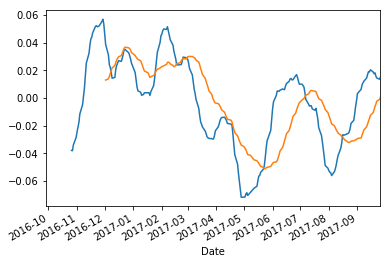

In [31]:
ma_8.plot()
ma_34.plot()

<h2>Linear regression with pandas</h2>
<h4>Example: TAN is the ticker for a solar ETF. FSLR, RGSE, and SCTY are tickers of companies that build or lease solar panels. Each has a different business model. We'll use pandas to study the risk reward tradeoff between the 4 investments and also see how correlated they are</h4>

In [32]:
import datetime
import pandas_datareader as data
start = datetime.datetime(2015,7,1)
end = datetime.datetime(2016,6,1)
solar_df = data.DataReader(['FSLR', 'TAN','RGSE','SCTY'],'google', start=start,end=end)['Close']

AttributeError: module 'pandas_datareader' has no attribute 'DataReader'

In [67]:
solar_df

NameError: name 'solar_df' is not defined

<h4>Let's calculate returns (the 1 day percent change)</h4>

In [ ]:
rets = solar_df.pct_change()
print(rets)

<h4>Let's visualize the relationship between each stock and the ETF</h4>

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(rets.FSLR,rets.TAN)

In [ ]:
plt.scatter(rets.RGSE,rets.TAN)

In [ ]:
plt.scatter(rets.SCTY,rets.TAN)

<h4>The correlation matrix</h4>

In [ ]:
solar_corr = rets.corr()
print(solar_corr)

<h3>Basic risk analysis</h3>
<h4>We'll plot the mean and std or returns for each ticker to get a sense of the risk return profile</h4>

In [ ]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()


<h2>Regressions</h2>
http://statsmodels.sourceforge.net/

<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [68]:
import numpy as np
import statsmodels.api as sm
X=solar_df[['FSLR','RGSE','SCTY']]
X = sm.add_constant(X)
y=solar_df['TAN']
model = sm.OLS(y,X,missing='drop')
result = model.fit()
print(result.summary())

NameError: name 'solar_df' is not defined

<h4>Finally plot the fitted line with the actual y values

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y)
ax.plot(result.fittedvalues)